<a href="https://colab.research.google.com/github/passosvasconcelos/well-log-data-analysis/blob/main/Log%20Analysis%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
#!pip install seaborn
#!pip install lasio
#!git clone https://github.com/passosvasconcelos/well-log-data-analysis.git
#%ls
#!rm -rf 'well-log-data-analysis'
!pip install welly


     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
  Created wheel for welly: filename=welly-0.4.8-cp36-none-any.whl size=55460 sha256=ce529a4aef657e59f345f34a84db7f6059a30c5dda37fcb84f0da2f1eb70eab4
  Stored in directory: /root/.cache/pip/wheels/34/cd/51/71f2e67b6599cb29b3120dfa63ed91d94e3e51b432afaceaab
  Created wheel for striplog: filename=striplog-0.8.8-cp36-none-any.whl size=83654 sha256=7bd43238b9c09a62f39f9cb1f44857479515cb19a6f11278227d9d13c78f9e5e
  Stored in directory: /root/.cache/pip/wheels/f2/24/74/bd0c5947a61b8891bf41a3c7e7e3de470382315c1fae297402
Successfully built welly striplog


In [202]:
%matplotlib inline
import pandas as pd
import numpy as np
import lasio
import seaborn as sns

# Machine learning libraries

from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

# Visualization libraries
import matplotlib.pylab as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from welly import Well
from ipywidgets import *



In [161]:
dataset = {}
faciesset = {}
mnemonic_description = {}
mnemonic_unit = {}
list_of_wells={}
lasfiles = ['/content/well-log-data-analysis/1-api-1-pr_wire.las',
           '/content/well-log-data-analysis/1-ca-3-pr_wire.las',
           '/content/well-log-data-analysis/1-cs-2-pr_wire.las',
           '/content/well-log-data-analysis/1-gb-1-pr_wire.las',
           '/content/well-log-data-analysis/1-gp-1-pr_wire.las',
           '/content/well-log-data-analysis/1-mo-1-pr_wire.las',
           '/content/well-log-data-analysis/1-mo-2-pr_wire.las',
           '/content/well-log-data-analysis/1-r-1-pr_wire.las',
           '/content/well-log-data-analysis/1-rca-1-pr_wire.las',
           '/content/well-log-data-analysis/1-ro-1-pr_wire.las',
           '/content/well-log-data-analysis/1-rs-1-pr_wire.las',
           '/content/well-log-data-analysis/2-an-1-pr_wire.las',
           '/content/well-log-data-analysis/2-ri-1-pr_wire.las',
           '/content/well-log-data-analysis/2-rp-1-pr_wire.las',
           '/content/well-log-data-analysis/2-tb-1-pr_wire.las']

for file in lasfiles:
    las = lasio.read(file)
    list_of_wells[las.well.WELL.value] = las
    dataset[las.well.WELL.value] = las.df()
    faciesset[las.well.WELL.value] = pd.read_csv('/content/well-log-data-analysis/'+las.well.WELL.value.lower()+'_lith.csv')
    for i in las.curves:
        mnemonic_description[i.mnemonic] = i.descr
        mnemonic_unit[i.mnemonic] = i.unit
    
    
#faciesfiles = ['1-api-1-pr_lith.csv',
#              '1-ca-3-pr_lith.csv',
#              '1-cost-1p-pr_lith.csv',
#              '1-cs-2-pr_lith.csv',
#              '1-gb-1-pr_lith.csv',
#              '1-gp-1-pr_lith.csv',
#              '1-mo-1-pr_lith.csv',
#              '1-mo-2-pr_lith.csv',
#              '1-r-1-pr_lith.csv',
#              '1-rca-1-pr_lith.csv',
#              '1-ro-1-pr_lith.csv',
#              '1-rs-1-pr_lith.csv',
#              '2-an-1-pr_lith.csv',
#              '2-ri-1-pr_lith.csv',
#              '2-rp-1-pr_lith.csv',
#              '2-tb-1-pr_lith.csv']






In [162]:
list_of_wells['2-TB-1-PR'].keys()

['DEPTH',
 'CALI',
 'DT',
 'DT_BHC',
 'FTEMP',
 'GR',
 'RES_FL',
 'RLAT',
 'RLN',
 'RSN',
 'SP',
 'TIME_SON']

In [ ]:
mnemonic_description

In [ ]:
mnemonic_unit

In [ ]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(logs.info())

In [164]:
for well, logs in dataset.items():
    dataset[well] = dataset[well].rename_axis('DEPTH').reset_index()
dataset['1-CA-3-PR'][['DEPTH', 'GR:1','GR:2']].iloc[3475:3490,:]

,DEPTH,GR:1,GR:2
3475,1577.6448,50.1957,NaN
3476,1577.7972,50.1939,NaN
3477,1577.9496,50.4866,NaN
3478,1578.1020,51.0818,NaN
3479,1578.2544,51.6770,NaN
3480,1578.4068,53.1661,NaN
3481,1578.5592,53.7607,NaN
3482,1578.7116,54.6523,NaN
3483,1578.8640,54.6499,NaN
3484,1579.0164,NaN,48.5


In [165]:
for well, logs in dataset.items():
    loganterior='--:--'
    for log in logs:
        if ":" in log:
            if loganterior.split(":")[0] == log.split(':')[0]:
                dataset[well][log] = logs[loganterior].fillna(logs[log])
                dataset[well].pop(loganterior)
            loganterior=log
    for log in logs:
        if ":" in log:
            dataset[well][log.split(":")[0]] = dataset[well][log]
            dataset[well].pop(log)

In [166]:
dataset['1-CA-3-PR'][['DEPTH', 'GR']].iloc[3475:3490,:]

,DEPTH,GR
3475,1577.6448,50.1957
3476,1577.7972,50.1939
3477,1577.9496,50.4866
3478,1578.1020,51.0818
3479,1578.2544,51.6770
3480,1578.4068,53.1661
3481,1578.5592,53.7607
3482,1578.7116,54.6523
3483,1578.8640,54.6499
3484,1579.0164,48.5000


In [167]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].info())


well: 1-API-1-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12720 entries, 0 to 12719
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   12720 non-null  float64
 1   DRHO    12292 non-null  float64
 2   DT      12454 non-null  float64
 3   FCNL    12292 non-null  float64
 4   FFDC    12292 non-null  float64
 5   ILD     12277 non-null  float64
 6   ILM     12277 non-null  float64
 7   MSFL    12211 non-null  float64
 8   NCNL    12292 non-null  float64
 9   NFDC    12292 non-null  float64
 10  NPHI    12292 non-null  float64
 11  RHOB    12292 non-null  float64
 12  RLN     12277 non-null  float64
 13  TT1     12454 non-null  float64
 14  TT2     12454 non-null  float64
 15  TT3     12454 non-null  float64
 16  TT4     12454 non-null  float64
 17  TTI     12455 non-null  float64
 18  CALI    12320 non-null  float64
 19  GR      12310 non-null  float64
 20  TENS    12318 non-null  float64
dtypes: float64(21)
me

In [168]:
dataset['1-API-1-PR'] = dataset['1-API-1-PR'][['DEPTH','CALI','GR','DT','RLN','RHOB','NPHI']]
dataset['1-CA-3-PR'] = dataset['1-CA-3-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'RLN','RHOB','NPHI']]
dataset['1-CS-2-PR'] = dataset['1-CS-2-PR'][['DEPTH', 'CAL2', 'GR', 'DT', 'ILD','RHOB','NPHI']].rename(columns={"CAL2": "CALI"})
dataset['1-GB-1-PR'] = dataset['1-GB-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPOR']].rename(columns={"NPOR": "NPHI"})
dataset['1-GP-1-PR'] = dataset['1-GP-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['1-MO-1-PR'] = dataset['1-MO-1-PR'][['DEPTH', 'GR', 'DT', 'RLN','NEUT']].rename(columns={"NEUT": "NPHI"})
dataset['1-MO-2-PR'] = dataset['1-MO-2-PR'][['DEPTH', 'GR', 'DT', 'RLN','NEUT']].rename(columns={"NEUT": "NPHI"})
dataset['1-R-1-PR'] = dataset['1-R-1-PR'][['DEPTH', 'GR', 'DT', 'RLN']]
dataset['1-RCA-1-PR'] = dataset['1-RCA-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['1-RO-1-PR'] = dataset['1-RO-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['1-RS-1-PR'] = dataset['1-RS-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['2-AN-1-PR'] = dataset['2-AN-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['2-RI-1-PR'] = dataset['2-RI-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['2-RP-1-PR'] = dataset['2-RP-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD','RHOB','NPHI']]
dataset['2-TB-1-PR'] = dataset['2-TB-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'RLN']]








In [169]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].info())


well: 1-API-1-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12720 entries, 0 to 12719
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   12720 non-null  float64
 1   CALI    12320 non-null  float64
 2   GR      12310 non-null  float64
 3   DT      12454 non-null  float64
 4   RLN     12277 non-null  float64
 5   RHOB    12292 non-null  float64
 6   NPHI    12292 non-null  float64
dtypes: float64(7)
memory usage: 695.8 KB
None

well: 1-CA-3-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   10689 non-null  float64
 1   CALI    7178 non-null   float64
 2   GR      10656 non-null  float64
 3   DT      10643 non-null  float64
 4   RLN     7175 non-null   float64
 5   RHOB    10659 non-null  float64
 6   NPHI    10649 non-null  float64
dtypes: float64(7)
memory usage: 584

In [170]:
for well, logs in dataset.items():
    dataset[well] = dataset[well].set_index('DEPTH').join(faciesset[well].set_index('DEPTH'))
    dataset[well] = pd.merge_ordered(dataset[well], faciesset[well], fill_method="ffill", on="DEPTH")
    dataset[well].pop('LITHOLOGY_x')
    dataset[well] = dataset[well].rename(columns={"LITHOLOGY_y": "LITHOLOGY"})

In [171]:
dataset['2-RP-1-PR'].head()

,DEPTH,CALI,GR,DT,ILD,RHOB,NPHI,LITHOLOGY
0,3263.55,275.0972,52.8071,59.0856,17.0216,2.5609,4.6288,SS
1,3263.70,NaN,NaN,NaN,NaN,NaN,NaN,SS
2,3263.85,274.0980,55.3565,58.6048,17.3357,2.5736,4.5905,SS
3,3264.00,272.8349,57.1590,58.1130,17.3389,2.5805,4.6758,SS
4,3264.15,271.8199,56.7190,57.8145,17.3445,2.5830,4.9849,SS


In [ ]:
#for well, logs in dataset.items():
    
    #dataset[well] = dataset[well][['GR', 'DT', 'RLN']]
#    dataset[well] = dataset[well].dropna(axis=0, how='any')
    
    

In [172]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].isna().sum())


well: 1-API-1-PR
DEPTH          0
CALI         400
GR           410
DT           266
RLN          443
RHOB         428
NPHI         428
LITHOLOGY      0
dtype: int64

well: 1-CA-3-PR
DEPTH            0
CALI         10480
GR            6844
DT            6857
RLN          10483
RHOB          6841
NPHI          6851
LITHOLOGY        0
dtype: int64

well: 1-CS-2-PR
DEPTH            0
CALI         21134
GR           21152
DT           21546
ILD          21546
RHOB         21546
NPHI         21546
LITHOLOGY        0
dtype: int64

well: 1-GB-1-PR
DEPTH             0
CALI          80993
GR           130153
DT           129517
ILD           40009
RHOB          80993
NPHI          81229
LITHOLOGY         0
dtype: int64

well: 1-GP-1-PR
DEPTH            0
CALI          8372
GR           15775
DT            8443
ILD           8386
RHOB         15755
NPHI         15774
LITHOLOGY        0
dtype: int64

well: 1-MO-1-PR
DEPTH          0
GR             0
DT           127
RLN            0
NPHI        

In [173]:
for well, logs in dataset.items():    
    dataset[well] = dataset[well].dropna(subset=['GR', 'DT'], axis=0, how='any')
    print('\nwell: '+well)
    print(dataset[well].isna().sum())


well: 1-API-1-PR
DEPTH         0
CALI         32
GR            0
DT            0
RLN          60
RHOB         60
NPHI         41
LITHOLOGY     0
dtype: int64

well: 1-CA-3-PR
DEPTH           0
CALI         3649
GR              0
DT              0
RLN          3649
RHOB           10
NPHI            0
LITHOLOGY       0
dtype: int64

well: 1-CS-2-PR
DEPTH        0
CALI         0
GR           0
DT           0
ILD          0
RHOB         0
NPHI         0
LITHOLOGY    0
dtype: int64

well: 1-GB-1-PR
DEPTH            0
CALI         39511
GR               0
DT               0
ILD            145
RHOB         39511
NPHI         39511
LITHOLOGY        0
dtype: int64

well: 1-GP-1-PR
DEPTH         0
CALI          0
GR            0
DT            0
ILD           0
RHOB         20
NPHI          5
LITHOLOGY     0
dtype: int64

well: 1-MO-1-PR
DEPTH        0
GR           0
DT           0
RLN          0
NPHI         0
LITHOLOGY    0
dtype: int64

well: 1-MO-2-PR
DEPTH        0
GR           0
DT        

In [174]:
for well, logs in dataset.items():
    dataset[well] = dataset[well][(logs.GR>0) & (logs.DT>0)]

In [175]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].info())


well: 1-API-1-PR
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12281 entries, 160 to 12637
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH      12281 non-null  float64
 1   CALI       12249 non-null  float64
 2   GR         12281 non-null  float64
 3   DT         12281 non-null  float64
 4   RLN        12221 non-null  float64
 5   RHOB       12221 non-null  float64
 6   NPHI       12240 non-null  float64
 7   LITHOLOGY  12281 non-null  object 
dtypes: float64(7), object(1)
memory usage: 863.5+ KB
None

well: 1-CA-3-PR
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11108 entries, 6831 to 17938
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH      11108 non-null  float64
 1   CALI       7459 non-null   float64
 2   GR         11108 non-null  float64
 3   DT         11108 non-null  float64
 4   RLN        7459 non-null   float64
 5   

In [ ]:
#for well, logs in dataset.items():
#    if well!='2-TB-1-PR':
#        dataset[well]['DT'] = dataset[well]['DT']/3.281

In [176]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].LITHOLOGY.unique())


well: 1-API-1-PR
['IGN' 'SH' 'SS' 'DMT' 'ST']

well: 1-CA-3-PR
['ST' 'SH' 'SS' 'CLU' 'DMT' 'IGN']

well: 1-CS-2-PR
['SS' 'ST' 'SH' 'DMT' 'IGN']

well: 1-GB-1-PR
['ST' 'SH' 'SS' 'IGN' 'CSS']

well: 1-GP-1-PR
['DMT' 'SS' 'ST' 'SH' 'IGN']

well: 1-MO-1-PR
['SS' 'DMT' 'ST' 'SH' 'CGL' 'IGN']

well: 1-MO-2-PR
['DMT' 'SS' 'SH' 'ST' 'CGL' 'IGN']

well: 1-R-1-PR
['IGN' 'SH' 'DOL' 'SS' 'ST' 'CSS' 'DMT']

well: 1-RCA-1-PR
['SH' 'IGN' 'SS' 'ST' 'CLU' 'DMT']

well: 1-RO-1-PR
['ST' 'SS' 'SH' 'CSS' 'DMT' 'IGN']

well: 1-RS-1-PR
['ST' 'SH' 'IGN' 'DOL' 'SS' 'DMT']

well: 2-AN-1-PR
['SS' 'ST' 'SH' 'DMT' 'IGN']

well: 2-RI-1-PR
['SH' 'DMT' 'SS' 'ST' 'IGN' 'CGL']

well: 2-RP-1-PR
['SS' 'ST' 'DMT' 'IGN' 'SH']

well: 2-TB-1-PR
['SS' 'SH' 'HT' 'ST']


In [177]:
def setlithcodes(lithology):
    if lithology == 'SS':
        return 1
    elif lithology == 'ST':
        return 2
    elif lithology == 'HT':
        return 3
    elif lithology == 'SH':
        return 4
    elif lithology == 'CSS':
        return 5
    elif lithology == 'CST':
        return 6
    elif lithology == 'CLU':
        return 7
    elif lithology == 'IGN':
        return 8
    elif lithology == 'DMT':
        return 9
    elif lithology == 'CGL':
        return 10
    elif lithology == 'DOL':
        return 11


In [178]:
for well, logs in dataset.items():    
    dataset[well]['LITH_CODE'] = logs.apply(lambda x: setlithcodes(x['LITHOLOGY']), axis=1)

In [157]:
def log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor, faciescode, clustercolor=0):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bottom = logs.DEPTH.max()
    n_cols = max(logtrack.values())+2
    if clustercolor!=0:
        n_cols = n_cols+1
    facies_track = n_cols-1
    cluster_track = n_cols-2
    f, ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (12,8))
    trackanterior=''
    for k, v in logtrack.items():
        if k=='LITH_CODE':
          ax[v].plot_2d(logs[k], logs.DEPTH, color = logcolor[k], label = k)
        if v == trackanterior:
            ax[v+1] = ax[v].twiny()
            ax[v+1].plot(logs[k], logs.DEPTH, color = logcolor[k], label = k)
            ax[v+1].set_xlabel(k)
            ax[v+1].set_xlim(logmin[k],logmax[k])
            ax[v+1].set_xscale(logscale[k])
            ax[v+1].set_ylim(top, bottom)
            ax[v+1].invert_yaxis()
            #ax[v+1].legend(fontsize='small', loc='lower right')
            trackanterior=v
        else:
            ax[v].plot(logs[k], logs.DEPTH, color = logcolor[k], label = k)
            ax[v].set_xlabel(k)
            ax[v].set_xlim(logmin[k],logmax[k])
            ax[v].set_xscale(logscale[k])
            ax[v].set_ylim(top, bottom)
            ax[v].invert_yaxis()
            ax[v].grid(True)        
            #ax[v].legend(fontsize='small', loc='upper right')
            trackanterior=v
    #cmap_facies = colors.ListedColormap(faciescolor, 'indexed')
    #cluster=np.repeat(np.expand_dims(logs['LITH_CODE'].values,1),100,1)
    #im=ax[facies_track].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies)
    #cbar=plt.colorbar(im, ax=ax[facies_track])
    #labels = faciescode
    #cbar.set_label((20*' ').join(labels))
    #cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    if clustercolor!=0:
        cmap_cluster = colors.ListedColormap(clustercolor.values())
        cluster2=np.repeat(np.expand_dims(logs['CLUSTER'].values,1),100,1)
        im2=ax[cluster_track].imshow(cluster2, interpolation='none', aspect='auto',cmap=cmap_cluster)
        #cbar2=plt.colorbar(im2, ax=ax[cluster_track])
        #labels2 = map(str, clustercolor.keys())
        #cbar2.set_label((15*' ').join(labels2))
        #cbar2.set_ticks(range(0,1)); cbar.set_ticklabels('')
        ax[cluster_track].set_xlabel("Clusters")
        ax[cluster_track].set_xticklabels([])
    
        
    for i in ax[1:]:
        i.set_yticklabels([])
        #i.locator_params(axis='x', nbins=4)
    ax[0].set_ylabel("Depth (m)")   
    ax[facies_track].set_xlabel("Lithology")
    ax[facies_track].set_xticklabels([])
    #ax.set_axis_off()
    
    #f.suptitle('Well: 2-TB-1-PR', fontsize=14,y=0.94)

In [196]:
w_log.data

{'CALI': Curve([275.0972,      nan, 274.098 , ...,      nan,      nan,      nan]),
 'DRHO': Curve([0.036888,      nan, 0.047458, ...,      nan,      nan,      nan]),
 'DT': Curve([59.0856,     nan, 58.6048, ...,     nan,     nan,     nan]),
 'GR': Curve([52.8071,     nan, 55.3565, ...,     nan,     nan,     nan]),
 'ILD': Curve([1.70216e+01,         nan, 1.73357e+01, ..., 1.00000e+05,
        1.00000e+05, 1.00000e+05]),
 'ILM': Curve([1.34781000e+01,            nan, 1.29250000e+01, ...,
        1.00000000e+05, 1.00000000e+05, 7.50085625e+04]),
 'LL3': Curve([20.1086,     nan, 19.8243, ..., 57.6758, 55.858 , 57.2912]),
 'NPHI': Curve([4.6288,    nan, 4.5905, ...,    nan,    nan,    nan]),
 'RHOB': Curve([2.5609,    nan, 2.5736, ...,    nan,    nan,    nan]),
 'RLAT': Curve([20.1086,     nan, 19.8243, ..., 57.6758, 55.858 , 57.2912]),
 'SP': Curve([ nan,  nan,  nan, ..., 30.3, 29.9, 29. ]),
 'TTI': Curve([ 0., nan,  0., ..., nan, nan, nan])}

interactive(children=(IntSlider(value=225, description='min_depth', max=400, min=50), IntSlider(value=225, des…

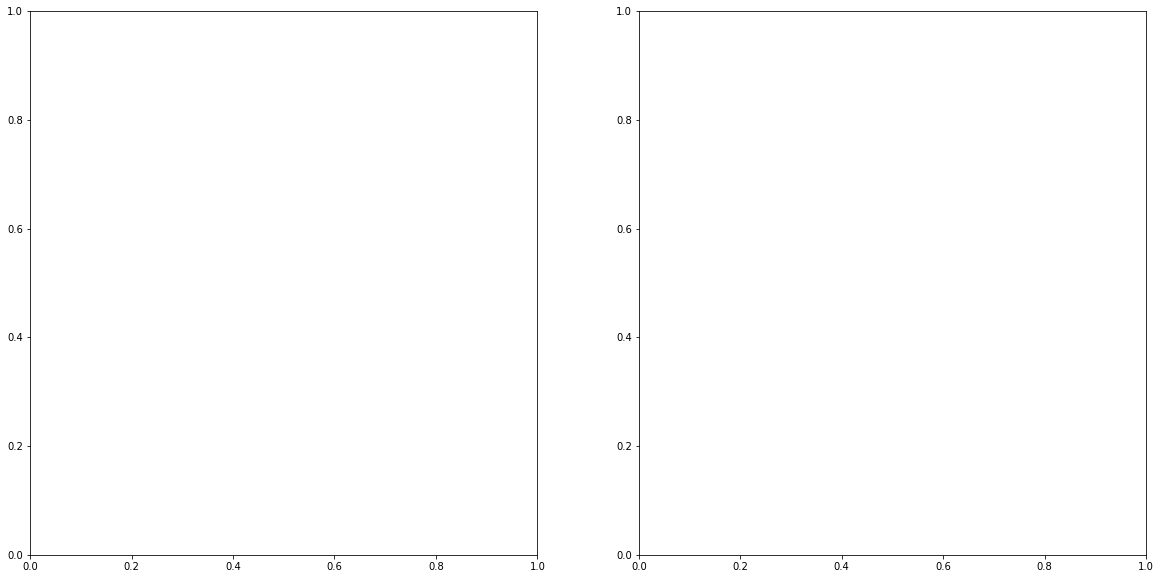

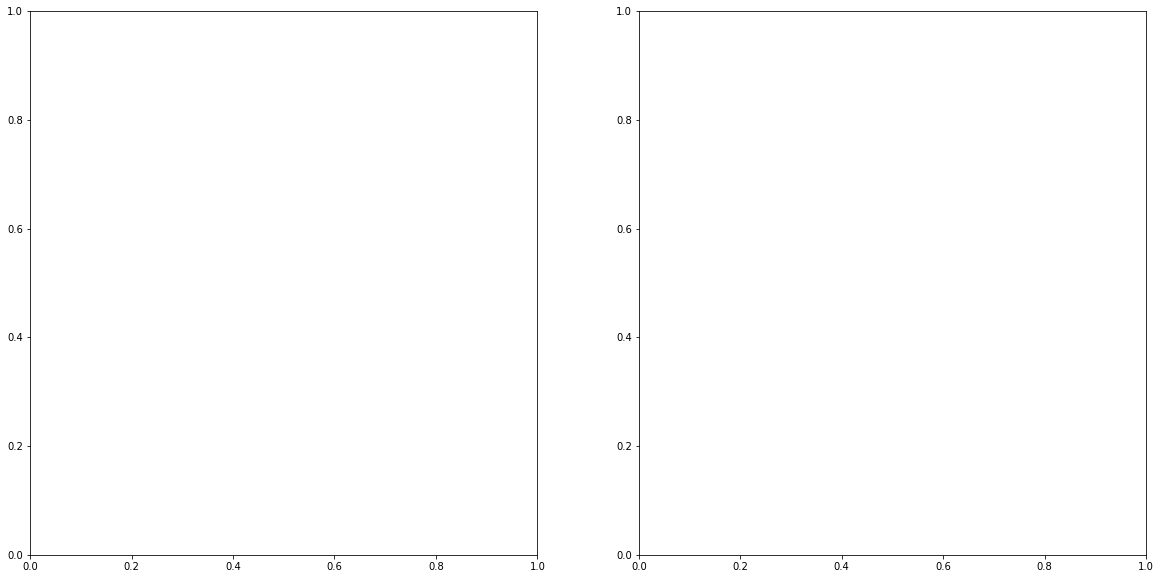

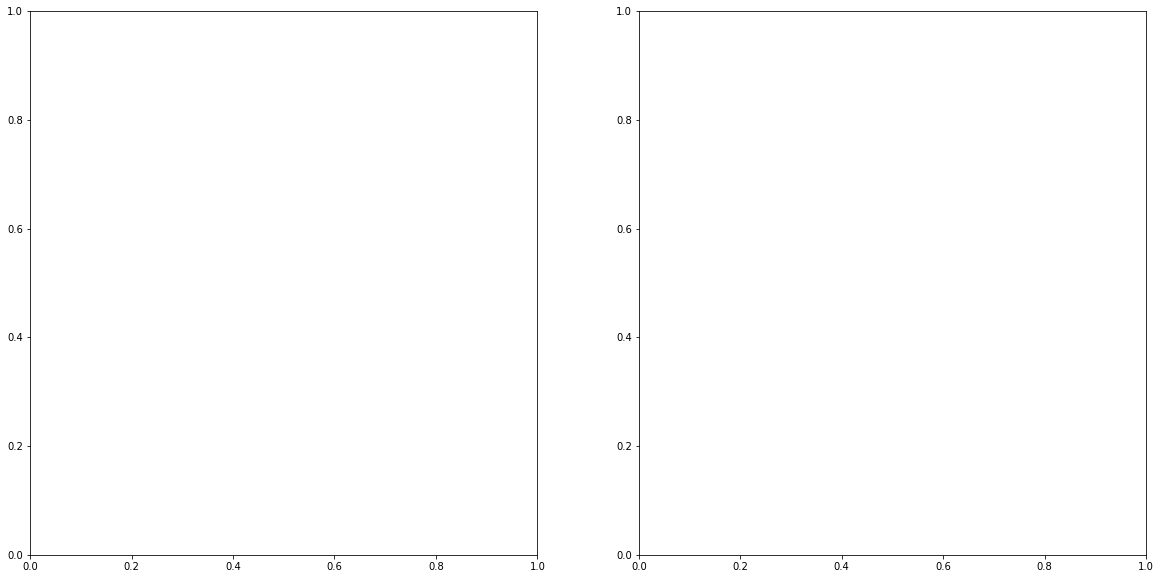

In [205]:
def plotting_func(start, stop, logs):
  fig, axes = plt.subplots(1,len(logs), figsize=(20,10))
  for i , log in enumerate(logs):
    segment = w_log.data[log].to_basis(start=start, stop=stop)
    if log=="DT":
      segment.plot_2d(ax=axes[i])
    else:
      segment.plot(ax=axes[i])
@interact
def modify_depth_ranges(min_depth=(50,400,1), max_depth=(50,400,1)):
  return plotting_func(min_depth, max_depth, logs)

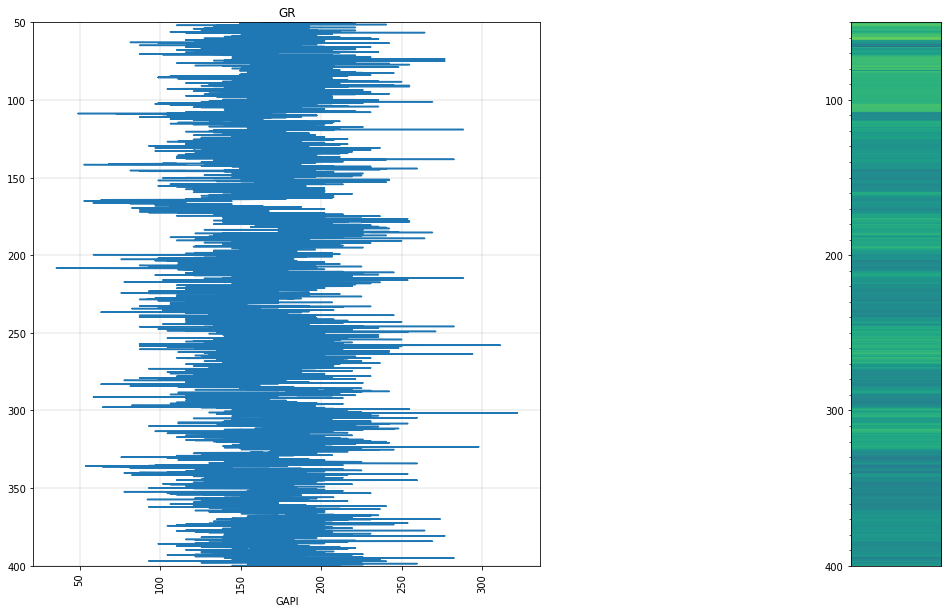

In [201]:
plotting_func(50,400,logs)

In [ ]:
w_log

In [192]:
dataset['2-RP-1-PR'].head()

,DEPTH,CALI,GR,DT,ILD,RHOB,NPHI,LITHOLOGY,LITH_CODE
0,3263.55,275.0972,52.8071,59.0856,17.0216,2.5609,4.6288,SS,1
2,3263.85,274.0980,55.3565,58.6048,17.3357,2.5736,4.5905,SS,1
3,3264.00,272.8349,57.1590,58.1130,17.3389,2.5805,4.6758,SS,1
4,3264.15,271.8199,56.7190,57.8145,17.3445,2.5830,4.9849,SS,1
5,3264.30,271.0579,54.4854,58.4437,17.5881,2.5854,5.2965,SS,1


In [159]:
logs = dataset['2-RP-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD', 'RHOB','NPHI','LITHOLOGY', 'LITH_CODE']]
logcolor = {'CALI':'blue',
            'GR':'green',
            'DT':'black',
            'ILD':'black',
            'RHOB':'red',
            'NPHI':'blue',
            'LITH_CODE':['yellow', 'orange', 'green' ,'red', 'black']}
faciescode = ['SS', 'ST', 'DMT', 'IGN', 'SH']
faciescolor = ['yellow', 'orange', 'green' ,'red', 'black']
logtrack = {'CALI':0,
            'GR':1,
            'DT':2,
            'ILD':4,
            'RHOB':3,
            'NPHI':3,
            'LITH_CODE':5}
logmin = {'CALI':100,
          'GR':0,
          'DT':140,
          'ILD':0.1,
          'RHOB':2,
          'NPHI':45}
logmax = {'CALI':350,
          'GR':250,
          'DT':40,
          'ILD':10000,
          'RHOB':3,
          'NPHI':-15}
logscale = {'CALI':'linear',
            'GR':'linear',
            'DT':'linear',
            'ILD':'log',
            'RHOB':'linear',
            'NPHI':'linear'}


In [197]:
w_log = Well.from_las('/content/well-log-data-analysis/2-tb-1-pr_wire.las')
logs =['GR','DT']

  
  
#log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor, faciescode)

/usr/local/lib/python3.6/dist-packages/welly/well.py:192: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [ ]:
dataset['2-RP-1-PR'].describe()

,DEPTH,CALI,GR,DT,RES,LITH_CODE
count,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000
mean,4058.600091,231.085998,71.864911,58.049557,24717.939369,4.188667
std,458.936464,29.935938,40.215853,7.835980,40673.624074,3.050759
min,3263.550000,178.017800,18.825000,46.026400,0.167000,1.000000
25%,3661.387500,209.324625,40.503875,50.012175,21.873675,1.000000
50%,4058.625000,221.030300,55.350800,59.004000,66.211850,4.000000
75%,4454.662500,243.130200,106.845025,62.437775,36532.187500,8.000000
max,4855.500000,322.953900,174.172400,108.539100,100000.000000,9.000000


In [ ]:
#logs = logs.astype({"LITHOLOGY":'category'})

logs['GR'] = logs['GR'].rolling(12, min_periods=1).mean()
logs['DT'] = logs['DT'].rolling(12, min_periods=1).mean()
logs['RLN'] = logs['RLN'].rolling(12, min_periods=1).mean()
logs['RLAT'] = logs['RLAT'].rolling(12, min_periods=1).mean()

In [ ]:
log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor)

In [ ]:
logs.info()

In [ ]:
sns.set_style("white")

plt.figure(figsize = (10,7), dpi = 80)

sns.histplot(data=logs, x = 'GR', hue='LITHOLOGY', palette=faciescolor, stat = 'density', kde=True)
plt.xlim(logs.GR.min(),logs.GR.max())

plt.figure(figsize = (10,7), dpi = 80)
sns.histplot(data=logs, x = 'DT', hue='LITHOLOGY', palette=faciescolor, stat = 'density', kde=True)
plt.xlim(logs.DT.min(),logs.DT.max())

plt.figure(figsize = (10,7), dpi = 80)
sns.histplot(data=logs, x = 'RLN', hue='LITHOLOGY', palette=faciescolor, stat = 'density', kde=True, log_scale=True)
plt.xlim(logs.RLN.min(),logs.DT.max())


In [ ]:
ax1 = sns.lmplot(data=logs, x='GR', y='DT', hue='LITHOLOGY', palette=faciescolor, fit_reg=False).set(xlim=(50, 220), ylim=(60, 110))
ax2 = sns.lmplot(data=logs, x='GR', y='RLAT', hue='LITHOLOGY', palette=faciescolor, fit_reg=False).set(xlim=(50, 220), ylim=(200, 20))
ax2.set(yscale="log")
ax3 = sns.lmplot(data=logs, x='GR', y='RLN', hue='LITHOLOGY', palette=faciescolor, fit_reg=False).set(xlim=(50, 220), ylim=(200, 20))
ax3.set(yscale="log")


In [ ]:
logs['Vsh'] = (logs.GR - logs.GR.min()) / (logs.GR.max() - logs.GR.min())

In [ ]:
logcolor['Vsh'] = 'green'
logtrack['Vsh'] = 5
logmin['Vsh'] = 0
logmax['Vsh'] = 1
logscale['Vsh'] = 'linear'

In [ ]:
logs.head()

In [ ]:
from sklearn.preprocessing import scale
logs_norm = logs.iloc[:, 2:5]
data = scale(logs_norm)

In [ ]:
data

In [ ]:
inertias = []
means = []
maxK = 30
for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('# of clusters', fontsize=24)
plt.ylabel('Sum of squared errors', fontsize=24)
plt.tick_params(labelsize=18)
# fig.savefig('images/Figure_3_k_means.tif', dpi=300, bbox_inches='tight')
# fig.savefig('images/Figure_3_k_means.png', dpi=300, bbox_inches='tight')

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)

# add the cluster ids to the dataset
#logs['Cluster'] = kmeans.labels_ + 1
logs['CLUSTER'] = kmeans.labels_

In [ ]:
cluster_colors = {2:'yellow', 4:'orange', 0:'green', 3:'purple', 1:'black'}

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
b = sns.boxplot(x='CLUSTER', y='GR', linewidth=0.5,
            data=logs, ax=ax[0,0],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("A",fontsize=20)
b.set_xlabel("")
b.set_ylabel("GR (gAPI)",fontsize=20)
b.tick_params(labelsize=14)

b = sns.boxplot(x='CLUSTER', y='DT', linewidth=0.5,
            data=logs, ax=ax[0,1],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("B",fontsize=20)
b.set_xlabel("")
b.set_ylabel("DT (uS/ft)",fontsize=20)
b.tick_params(labelsize=14)

b=sns.boxplot(x='CLUSTER', y='RLN', linewidth=0.5,
            data=logs, ax=ax[1,0],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("C",fontsize=20)
b.set_xlabel("Cluster Index",fontsize=20)
b.set_ylabel("RLN (ohm.m)",fontsize=20)
b.tick_params(labelsize=14)
b.invert_yaxis()
b.set_yscale("log")

b=sns.boxplot(x='CLUSTER', y='RLAT', linewidth=0.5,
            data=logs, ax=ax[1,1],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("D",fontsize=20)
b.set_xlabel("Cluster Index",fontsize=20)
b.set_ylabel("RLAT (ohmm)",fontsize=20)
b.tick_params(labelsize=14)
b.invert_yaxis()
b.set_yscale("log")

#plt.tight_layout()
# fig.savefig('images/Figure_4_Cluster_fingerprint.png', dpi=300, bbox_inches='tight')
# fig.savefig('images/Figure_4_Cluster_fingerprint.tif', dpi=300, bbox_inches='tight')

In [ ]:
logs.head()

In [ ]:
clustercolor = {0:'green', 1:'black', 2:'yellow', 3:'purple', 4:'orange' }
log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor, clustercolor)